# Best Model to Predict Plant Nutrition

# Name : Muhammad Julizar

# External Link

# 4. Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Algoritma model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Model Saving and load
import joblib
import json


# 5. Loading Data

In [2]:
df = pd.read_excel('D:\Hacktiv 8\Work\Kalbe and Aria\\aria_data.xlsx')

In [3]:
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [4]:
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [5]:
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


# 6. Exploratory Data Analysis

In [7]:
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [8]:
df.isna().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Nilai skewness pada kolom Target : -0.15828173643344287


Text(0.5, 1.0, 'Distribusi Outlier')

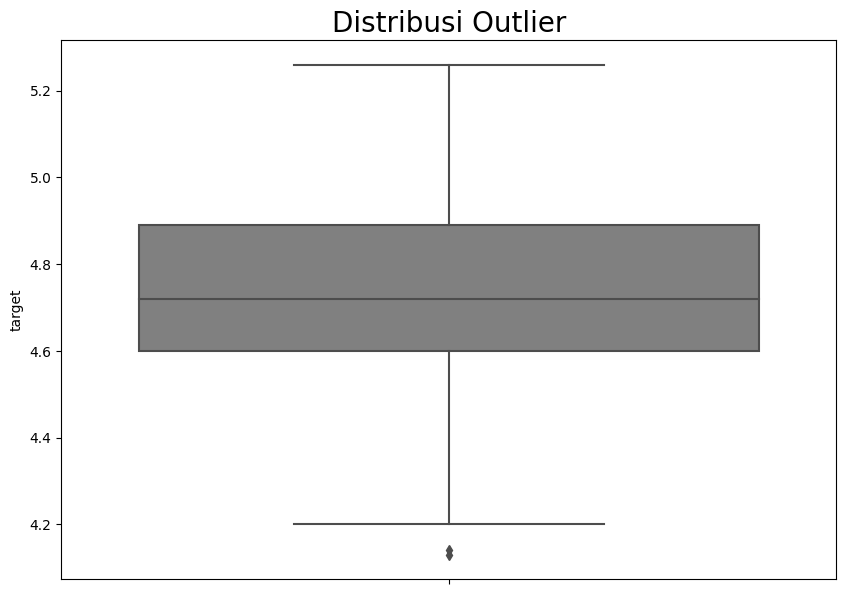

In [61]:
plt.figure(figsize=(10,7))

print(f'Nilai skewness pada kolom Target : {df.target.skew()}')
sns.boxplot(y=df['target'], color='grey')
plt.title('Distribusi Outlier', fontsize=20)


Jika dilihat dari distribusi outlier tergolong normal pada kolom `target`, karena memiliki nilai skewness -0.15828173643344287

In [64]:
df.groupby('sample_type')[['sample_type']].count()

,sample_type
sample_type,
lab 1,100
lab 2,60


Text(0.5, 1.0, 'Jumlah pengetesan di Lab')

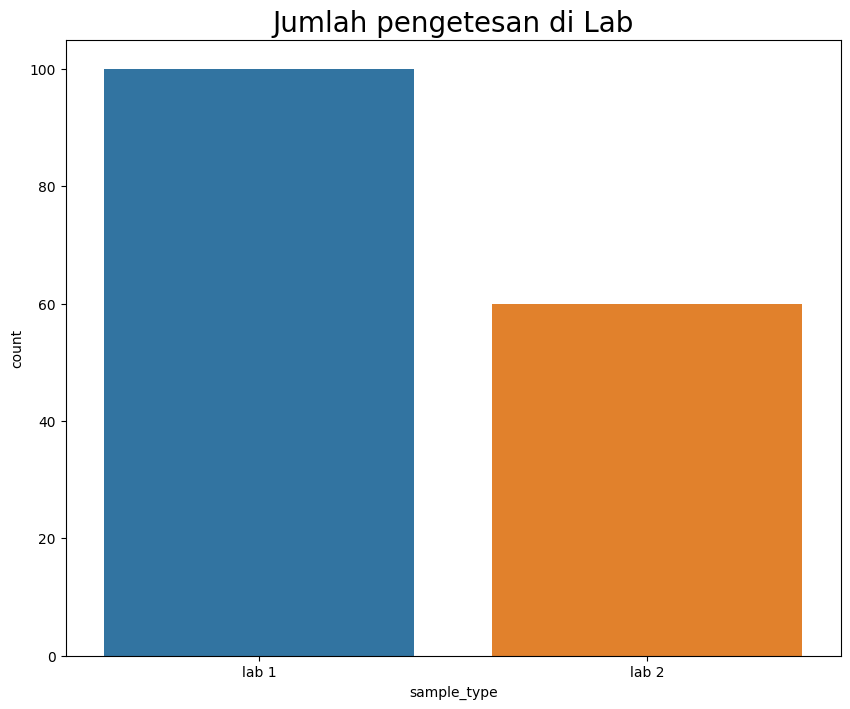

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x=df.sample_type)
plt.title('Jumlah pengetesan di Lab', fontsize=20)

Seperti yang kita lihat bahwa lebih banyak pengujian nutrisi pada Lab 1 dibanding Lab 2

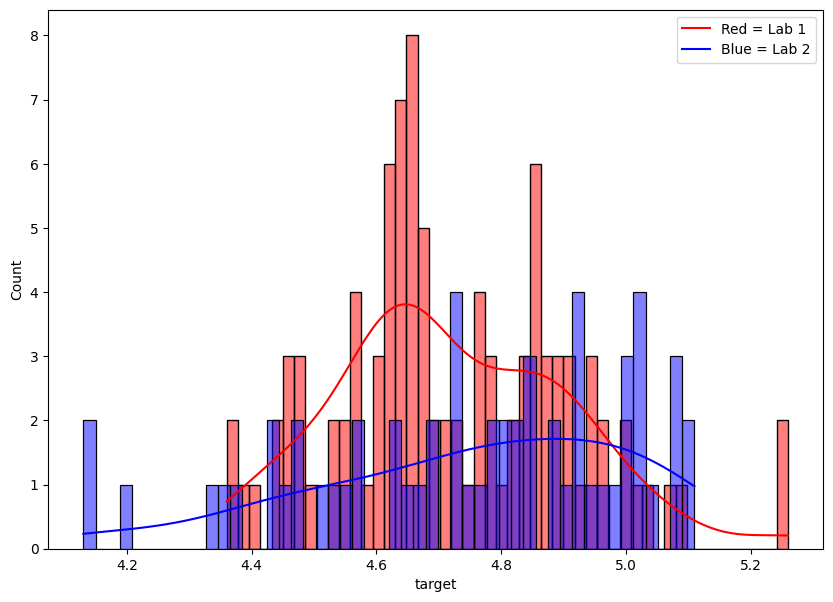

In [11]:
# memisahkan value 0 dan 1 pada default_payment
limit_0 = df.loc[df['sample_type'] == 'lab 1']['target']
limit_1 = df.loc[df['sample_type'] == 'lab 2']['target']

# membuat histogram perbandingan antara value 0 dan 1
plt.figure(figsize = (10,7))
sns.histplot(limit_0,kde=True,bins=50, color="red")
sns.histplot(limit_1,kde=True,bins=50, color="blue")
plt.legend(['Red = Lab 1', 'Blue = Lab 2'])

Pengetesan nutrisi pada tumbuhan paling banyak ada pada Lab1 dengan rata-rata data berada di range 4.6 sampai 4.8. sedangkan pada distribusi lab 2 bisa dikatakan merata.

In [14]:
df.skew(numeric_only=True)

target   -0.158282
v1        0.639911
v2        1.461728
v3        0.602655
v4        1.143693
v5        1.270640
v6        1.295483
v7       -0.107235
v8       -0.766444
dtype: float64

Hampir semua variabel memiliki nilai skewness yang abnormal, dikarenakan variabel2 ini penting untuk nutrisi dan jumlah data yang sedikit maka tidak dilakukan penghapusan outlier, karena outlier yang ada termasuk dalam natural outlier.
Nilai skew akan dipakai untuk `menentukan metode scalling`, dan metode yang dipilih adalah MinMaxScaler atau normalisasi

<AxesSubplot: >

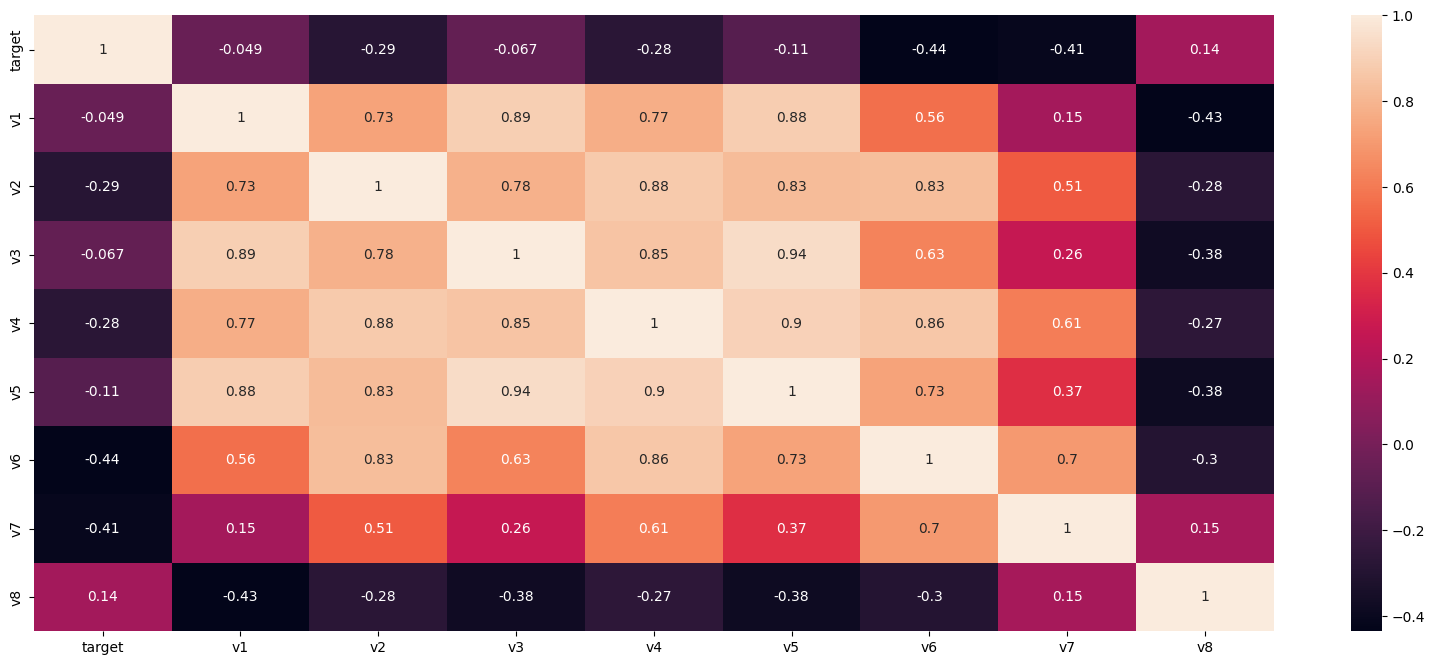

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(numeric_only=True,method='spearman'), annot=True)


Metode korelasi yang dipilih adalah metode spearman, hal ini dikarenakan nilai skewness pada semua variabelnya rata-rata tidak normal atau skewed.

Dari hasil korelasi diatas dapat kita lihat bahwa feature/ variabel yg dapat kita ambil hanya 6, yaitu:<br>
`v2, v4, v5, v6, v7, v8`

# 7. Data Preprocessing

In [18]:
# memisahkan daata inference
df_inf = df.sample(10, random_state=7)
df_train_test = df.drop(df_inf.index)
df_train_test.reset_index(drop=True,inplace=True)
df_train_test.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


## Feature Selection

In [19]:
num_columns = ['v2', 'v4', 'v5', 'v6', 'v7','v8']

print(num_columns)

['v2', 'v4', 'v5', 'v6', 'v7', 'v8']


In [20]:
X =  df_train_test.drop(['target'], axis=1)
y = df_train_test['target']

In [21]:
# memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=78)
print(f'Data train : {X_train.shape}')
print(f'Data test : {X_test.shape}')

Data train : (120, 9)
Data test : (30, 9)


In [22]:
X_train.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
122,593.812500,379.625000,637.125000,489.000000,672.875000,368.3750,689.375000,3836.5625,lab 2
140,583.875000,349.187500,641.625000,477.000000,664.000000,327.8125,665.750000,3917.6250,lab 2
100,495.333333,182.933333,549.533333,344.533333,457.866667,189.2000,586.266667,4324.6000,lab 2
79,284.875000,198.562500,412.187500,378.125000,457.562500,246.2500,745.375000,4745.3750,lab 1
21,248.937500,182.187500,359.875000,315.625000,389.500000,199.5625,620.875000,4658.9375,lab 1


## Scalling

In [23]:
# Pembuatan process scalling dan encoding utk pipeline
processor = ColumnTransformer([
    ('pipe_num', MinMaxScaler(), num_columns),
])
processor

ColumnTransformer(transformers=[('pipe_num', MinMaxScaler(),
                                 ['v2', 'v4', 'v5', 'v6', 'v7', 'v8'])])

# 8. Modelling

In [24]:
# Definition 4 model
lr = LinearRegression()
svm = SVR()
rf = RandomForestRegressor(random_state=77)
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()


In [25]:
# model training using pipeline
pipeline_lr = Pipeline(
    steps=[("processor", processor), ("lr", lr)])

pipeline_svm= Pipeline(
    steps=[("processor", processor), ("svm", svm)])

pipeline_rf = Pipeline(
    steps=[('processor', processor), ('rf', rf)])

pipeline_gb = Pipeline(
    steps=[('processor', processor), ('gb', gb)])

pipeline_knn = Pipeline(
    steps=[('processor', processor), ('knn', knn)])

# 9. Model Training

## A. Linear Regression

In [26]:
# fit model
pipeline_lr.fit(X_train,y_train)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('pipe_num', MinMaxScaler(),
                                                  ['v2', 'v4', 'v5', 'v6', 'v7',
                                                   'v8'])])),
                ('lr', LinearRegression())])

## B. SVM

In [27]:
# fit model
pipeline_svm.fit(X_train,y_train)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('pipe_num', MinMaxScaler(),
                                                  ['v2', 'v4', 'v5', 'v6', 'v7',
                                                   'v8'])])),
                ('svm', SVR())])

## C. Random Forest

In [28]:
# fit model
pipeline_rf.fit(X_train,y_train)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('pipe_num', MinMaxScaler(),
                                                  ['v2', 'v4', 'v5', 'v6', 'v7',
                                                   'v8'])])),
                ('rf', RandomForestRegressor(random_state=77))])

## D. Gradient Boosting

In [29]:
# fit model
pipeline_gb.fit(X_train,y_train)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('pipe_num', MinMaxScaler(),
                                                  ['v2', 'v4', 'v5', 'v6', 'v7',
                                                   'v8'])])),
                ('gb', GradientBoostingRegressor())])

## E. K-Neirest Neighbors

In [30]:
# fit model
pipeline_knn.fit(X_train,y_train)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('pipe_num', MinMaxScaler(),
                                                  ['v2', 'v4', 'v5', 'v6', 'v7',
                                                   'v8'])])),
                ('knn', KNeighborsRegressor())])

# 10. Model Evaluation

In [31]:
# predict model
lr_pred_train = pipeline_lr.predict(X_train)
lr_pred_test = pipeline_lr.predict(X_test)

In [32]:
# predict model
svm_pred_train = pipeline_svm.predict(X_train)
svm_pred_test = pipeline_svm.predict(X_test)


In [33]:
# predict model
rf_pred_train = pipeline_rf.predict(X_train)
rf_pred_test = pipeline_rf.predict(X_test)


In [34]:
# predict model
gb_pred_train = pipeline_gb.predict(X_train)
gb_pred_test = pipeline_gb.predict(X_test)


In [35]:
# predict model
knn_pred_train = pipeline_knn.predict(X_train)
knn_pred_test = pipeline_knn.predict(X_test)


## Metrics Score

In [36]:
all_reports={}
# MAE
score2 = {
        'Linear Regression -Trein'   : round(mean_absolute_error(lr_pred_train,y_train), 4),
        'Linear Regression -Test'    : round(mean_absolute_error(lr_pred_test, y_test), 4),
        'SVM Regressor - Train'      : round(mean_absolute_error(svm_pred_train,y_train), 4),
        'SVM Regressor - Test'       : round(mean_absolute_error(svm_pred_test, y_test), 4),
        'Random Forest -Train'       : round(mean_absolute_error(rf_pred_train,y_train),4),
        'Random Forest -Test'        : round(mean_absolute_error(rf_pred_test,y_test),4),
        'GradientBoosting -Train'    : round(mean_absolute_error(gb_pred_train,y_train),4),
        'GradientBoosting -Test'     : round(mean_absolute_error(gb_pred_test,y_test),4),
        'KNeighborsRegressor -Train' : round(mean_absolute_error(knn_pred_train,y_train ),4),
        'KNeighborsRegressor -Test' : round(mean_absolute_error(knn_pred_test,y_test ),4)
}
all_reports['MAE'] = score2

a = pd.DataFrame(all_reports)

In [37]:
# RMSE
score3 = {
        'Linear Regression -Trein'   : round(np.sqrt(mean_squared_error(lr_pred_train,y_train)), 4),
        'Linear Regression -Test'    : round(np.sqrt(mean_squared_error(lr_pred_test, y_test)), 4),
        'SVM Regressor - Train'      : round(np.sqrt(mean_squared_error(svm_pred_train,y_train)), 4),
        'SVM Regressor - Test'       : round(np.sqrt(mean_squared_error(svm_pred_test, y_test)), 4),
        'Random Forest -Train'       : round(np.sqrt(mean_squared_error(rf_pred_train,y_train)),4),
        'Random Forest -Test'        : round(np.sqrt(mean_squared_error(rf_pred_test,y_test)),4),
        'GradientBoosting -Train'    : round(np.sqrt(mean_squared_error(gb_pred_train,y_train)),4),
        'GradientBoosting -Test'     : round(np.sqrt(mean_squared_error(gb_pred_test,y_test)),4),
        'KNeighborsRegressor -Train' : round(np.sqrt(mean_squared_error(knn_pred_train,y_train)),4),
        'KNeighborsRegressor -Test' : round(np.sqrt(mean_squared_error(knn_pred_test,y_test)),4)
}
all_reports['RMSE'] = score3

b = pd.DataFrame(all_reports)

In [38]:
# MSE
score4 = {
        'Linear Regression -Trein'   : round(mean_squared_error(lr_pred_train,y_train), 4),
        'Linear Regression -Test'    : round(mean_squared_error(lr_pred_test, y_test), 4),
        'SVM Regressor - Train'      : round(mean_squared_error(svm_pred_train,y_train), 4),
        'SVM Regressor - Test'       : round(mean_squared_error(svm_pred_test, y_test), 4),
        'Random Forest -Train'       : round(mean_squared_error(rf_pred_train,y_train),4),
        'Random Forest -Test'        : round(mean_squared_error(rf_pred_test,y_test),4),
        'GradientBoosting -Train'    : round(mean_squared_error(gb_pred_train,y_train),4),
        'GradientBoosting -Test'     : round(mean_squared_error(gb_pred_test,y_test),4),
        'KNeighborsRegressor -Train' : round(mean_squared_error(knn_pred_train,y_train ),4),
        'KNeighborsRegressor -Test' : round(mean_squared_error(knn_pred_test,y_test ),4)
}
all_reports['MSE'] = score4

c = pd.DataFrame(all_reports)
c

,MAE,RMSE,MSE
Linear Regression -Trein,0.1520,0.1853,0.0344
Linear Regression -Test,0.1627,0.1966,0.0387
SVM Regressor - Train,0.1353,0.1640,0.0269
SVM Regressor - Test,0.1596,0.1816,0.0330
Random Forest -Train,0.0580,0.0749,0.0056
Random Forest -Test,0.1539,0.1858,0.0345
GradientBoosting -Train,0.0353,0.0427,0.0018
GradientBoosting -Test,0.1451,0.1747,0.0305
KNeighborsRegressor -Train,0.1244,0.1599,0.0256
KNeighborsRegressor -Test,0.1752,0.2056,0.0423


## Tuning Parameter

In [39]:
# Parameter Liner regression
parameter_lr ={
    'lr__n_jobs' : [1,2,3]
    }

#Parameter SVR
parameter_svm = {
    'svm__kernel' : ['rbf', 'sigmoid'],
    'svm__degree' : [3,4,5,6],
    'svm__gamma' : ['scale', 'auto']
}

# Parameter random forest
parameter_rf = {
    'rf__n_estimators' : [200,250,500,700],
    'rf__criterion' : ['squared_error', 'absolute_error'],
    'rf__max_depth': [2,3,4]
}

parameter_gb = {
    'gb__n_estimators'  : [200,300,500,1000],
    'gb__learning_rate' : [0.1,0.3,0.4],
}

# Parameter KNN
parameter_knn = {
    'knn__n_neighbors' : [3,4],
    'knn__leaf_size' : [30, 45]
}

## A. Linear regression

In [41]:
# Tuning Process Linear Regrssion
lr_grid = GridSearchCV(estimator=pipeline_lr,
                         param_grid=parameter_lr,
                         cv=5,
                         verbose=1)
lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         MinMaxScaler(),
                                                                         ['v2',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8'])])),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__n_jobs': [1, 2, 3]}, verbose=1)

In [42]:
# best parameter linear regression
lr_grid.best_params_

# predict using best parameter
lr_grid_best = lr_grid.best_estimator_

lr_grid_best.fit(X_train,y_train)
lr_pred_train_tune = lr_grid_best.predict(X_train)
lr_pred_test_tune = lr_grid_best.predict(X_test)

## B. SVM

In [43]:
# Tuning Process Random Forest

svm_grid = GridSearchCV(estimator=pipeline_svm,
                         param_grid=parameter_svm,
                         cv=5,
                         verbose=1
                        )
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         MinMaxScaler(),
                                                                         ['v2',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8'])])),
                                       ('svm', SVR())]),
             param_grid={'svm__degree': [3, 4, 5, 6],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf', 'sigmoid']},
             verbose=1)

In [44]:
# Kneighbors best parameter
svm_grid.best_params_

# predict using best parameter
svm_grid_best = svm_grid.best_estimator_

svm_grid_best.fit(X_train,y_train)
svm_pred_train_tune = svm_grid_best.predict(X_train)
svm_pred_test_tune = svm_grid_best.predict(X_test)

## C. Random Forest

In [45]:
# Tuning Process Random Forest

rf_grid = GridSearchCV(estimator=pipeline_rf,
                         param_grid=parameter_rf,
                         cv=5,
                         verbose=1
                        )
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         MinMaxScaler(),
                                                                         ['v2',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8'])])),
                                       ('rf',
                                        RandomForestRegressor(random_state=77))]),
             param_grid={'rf__criterion': ['squared_error', 'absolute_error'],
                         'rf__max_depth': [2, 3, 4],
                         'rf__n_estimators': [200, 250, 500, 700]},
             verbose=1)

In [46]:
# best parameter random forest
rf_grid.best_params_

# predict using best parameter
rf_grid_best = rf_grid.best_estimator_

rf_grid_best.fit(X_train, y_train)
rf_pred_train_tune =rf_grid_best.predict(X_train)
rf_pred_test_tune =rf_grid_best.predict(X_test)

## D. Gradient Boosting

In [47]:
# tuning parameter gradient boosting
gb_grid = GridSearchCV(estimator=pipeline_gb,
                         param_grid=parameter_gb,
                         cv=5,
                         verbose=1
                        )
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         MinMaxScaler(),
                                                                         ['v2',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8'])])),
                                       ('gb', GradientBoostingRegressor())]),
             param_grid={'gb__learning_rate': [0.1, 0.3, 0.4],
                         'gb__n_estimators': [200, 300, 500, 1000]},
             verbose=1)

In [48]:
# best parameter gradient boosting
gb_grid.best_params_

# predict using best parameter 
gb_grid_best = gb_grid.best_estimator_

gb_grid_best.fit(X_train,y_train)
gb_pred_train_tune = gb_grid_best.predict(X_train)
gb_pred_test_tune = gb_grid_best.predict(X_test)

## E. KNN

In [49]:
# tuning parameter Knneighbors regresor
knn_grid = GridSearchCV(estimator=pipeline_knn,
                         param_grid=parameter_knn,
                         cv=5,
                         verbose=1
                        )
knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         MinMaxScaler(),
                                                                         ['v2',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__leaf_size': [30, 45],
                         'knn__n_neighbors': [3, 4]},
             verbose=1)

In [50]:
# Kneighbors best parameter
knn_grid.best_params_

# predict using best parameter
knn_grid_best = knn_grid.best_estimator_

knn_grid_best.fit(X_train,y_train)
knn_pred_train_tune = knn_grid_best.predict(X_train)
knn_pred_test_tune = knn_grid_best.predict(X_test)

## Metrics Score tuning

In [51]:
# Scoring to data frame
all_reports= {}

# MAE
score2 = {
        'Linear Regression -Trein'   : round(mean_absolute_error(lr_pred_train_tune,y_train), 4),
        'Linear Regression -Test'    : round(mean_absolute_error(lr_pred_test_tune, y_test), 4),
        'SVM Regressor - Train'      : round(mean_absolute_error(svm_pred_train_tune,y_train), 4),
        'SVM Regressor - Test'       : round(mean_absolute_error(svm_pred_test_tune, y_test), 4),
        'Random Forest -Train'       : round(mean_absolute_error(rf_pred_train_tune,y_train),4),
        'Random Forest -Test'        : round(mean_absolute_error(rf_pred_test_tune,y_test),4),
        'GradientBoosting -Train'    : round(mean_absolute_error(gb_pred_train_tune,y_train),4),
        'GradientBoosting -Test'     : round(mean_absolute_error(gb_pred_test_tune,y_test),4),
        'KNeighborsRegressor -Train' : round(mean_absolute_error(knn_pred_train_tune,y_train ),4),
        'KNeighborsRegressor -Test' : round(mean_absolute_error(knn_pred_test_tune,y_test ),4)
}
all_reports['MAE'] = score2

tune_a = pd.DataFrame(all_reports)

In [52]:
# RMSE
score3= {
        'Linear Regression -Trein'   : round(np.sqrt(mean_squared_error(lr_pred_train_tune,y_train)), 4),
        'Linear Regression -Test'    : round(np.sqrt(mean_squared_error(lr_pred_test_tune, y_test)), 4),
        'SVM Regressor - Train'      : round(np.sqrt(mean_squared_error(svm_pred_train_tune,y_train)), 4),
        'SVM Regressor - Test'       : round(np.sqrt(mean_squared_error(svm_pred_test_tune, y_test)), 4),
        'Random Forest -Train'       : round(np.sqrt(mean_squared_error(rf_pred_train_tune,y_train)),4),
        'Random Forest -Test'        : round(np.sqrt(mean_squared_error(rf_pred_test_tune,y_test)),4),
        'GradientBoosting -Train'    : round(np.sqrt(mean_squared_error(gb_pred_train_tune,y_train)),4),
        'GradientBoosting -Test'     : round(np.sqrt(mean_squared_error(gb_pred_test_tune,y_test)),4),
        'KNeighborsRegressor -Train' : round(np.sqrt(mean_squared_error(knn_pred_train_tune,y_train )),4),
        'KNeighborsRegressor -Test' : round(np.sqrt(mean_squared_error(knn_pred_test_tune,y_test )),4)
}
all_reports['RMSE'] = score3

tune_b = pd.DataFrame(all_reports)


In [53]:
# MSE
score4= {
        'Linear Regression -Trein'   : round(mean_squared_error(lr_pred_train_tune,y_train), 4),
        'Linear Regression -Test'    : round(mean_squared_error(lr_pred_test_tune, y_test), 4),
        'SVM Regressor - Train'      : round(mean_squared_error(svm_pred_train_tune,y_train), 4),
        'SVM Regressor - Test'       : round(mean_squared_error(svm_pred_test_tune, y_test), 4),
        'Random Forest -Train'       : round(mean_squared_error(rf_pred_train_tune,y_train),4),
        'Random Forest -Test'        : round(mean_squared_error(rf_pred_test_tune,y_test),4),
        'GradientBoosting -Train'    : round(mean_squared_error(gb_pred_train_tune,y_train),4),
        'GradientBoosting -Test'     : round(mean_squared_error(gb_pred_test_tune,y_test),4),
        'KNeighborsRegressor -Train' : round(mean_squared_error(knn_pred_train_tune,y_train ),4),
        'KNeighborsRegressor -Test' : round(mean_squared_error(knn_pred_test_tune,y_test ),4)
}
all_reports['MSE'] = score4

tune_c = pd.DataFrame(all_reports)
tune_c

,MAE,RMSE,MSE
Linear Regression -Trein,0.1520,0.1853,0.0344
Linear Regression -Test,0.1627,0.1966,0.0387
SVM Regressor - Train,0.1353,0.1640,0.0269
SVM Regressor - Test,0.1596,0.1816,0.0330
Random Forest -Train,0.1332,0.1658,0.0275
Random Forest -Test,0.1614,0.1944,0.0378
GradientBoosting -Train,0.0000,0.0000,0.0000
GradientBoosting -Test,0.1616,0.1928,0.0372
KNeighborsRegressor -Train,0.1220,0.1558,0.0243
KNeighborsRegressor -Test,0.1771,0.2103,0.0442


C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_22524\4109075596.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0.5, 1.0, 'Mean Absolute Erorr')

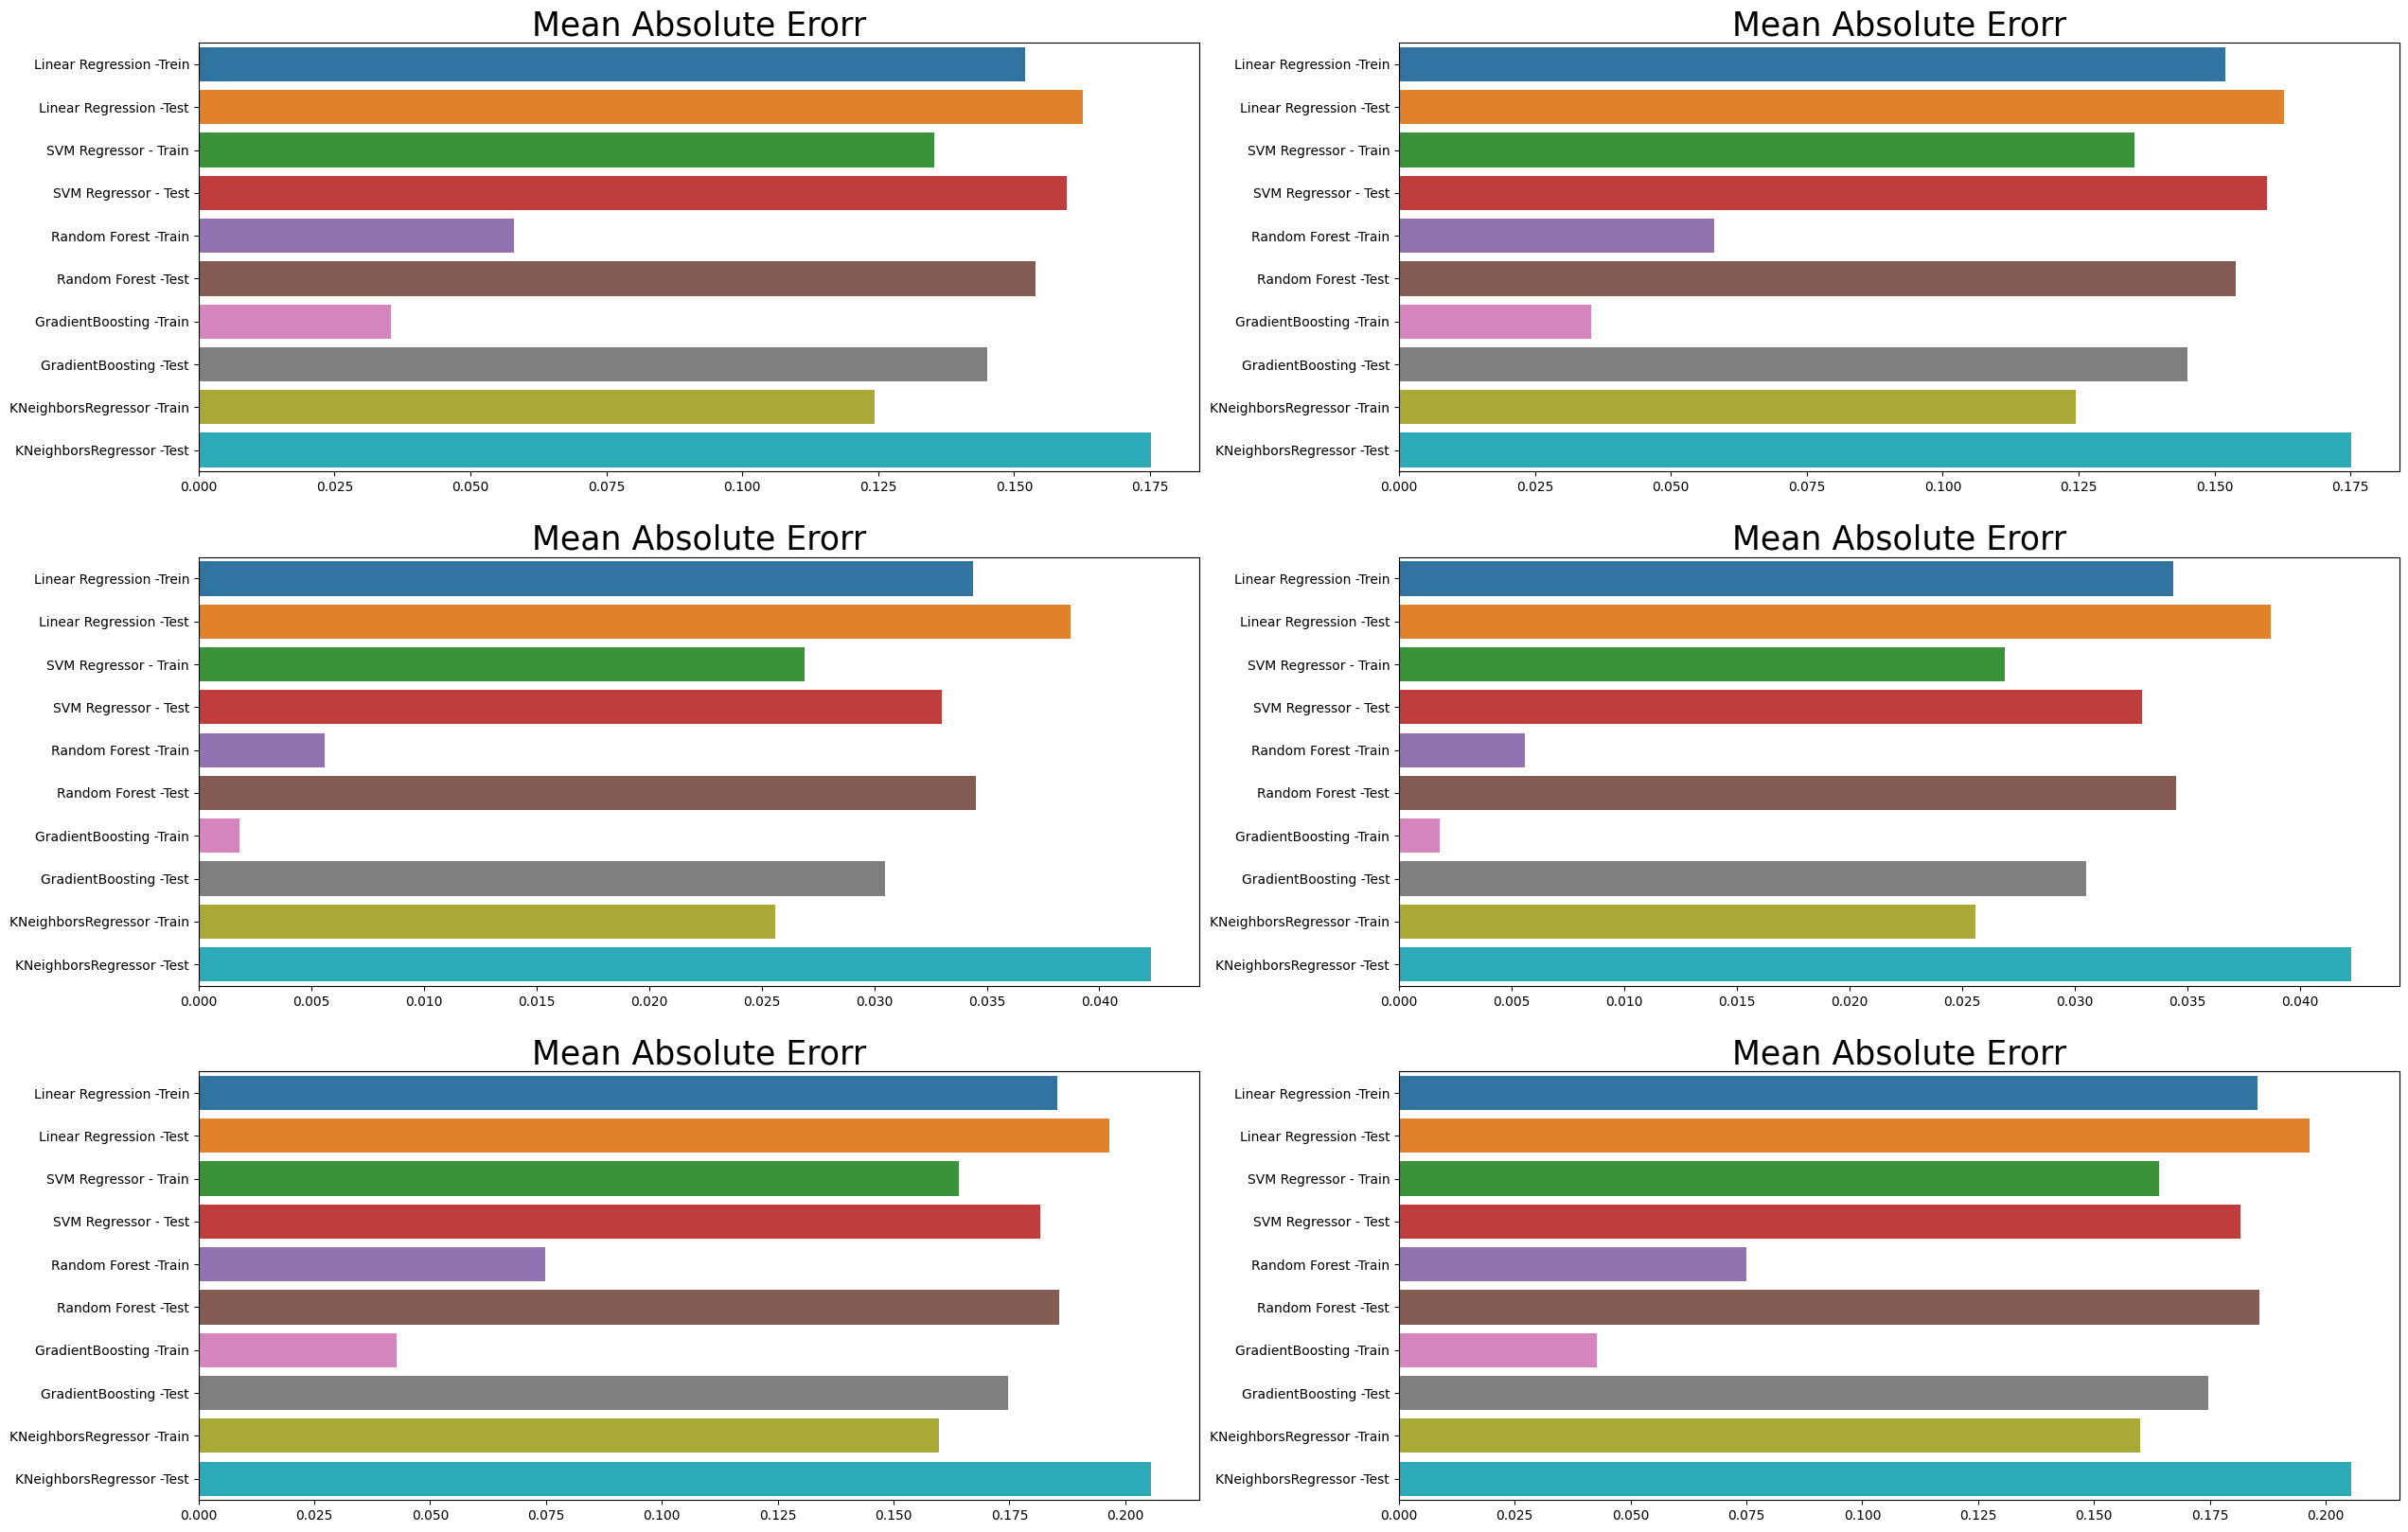

In [54]:
# plotting r2 score evaluation 
plt.subplots(figsize=(30,20))


plt.subplot(3,2,1)
sns.barplot(data=c, y=c['MAE'].index,x=c['MAE'].values)
plt.title('Mean Absolute Erorr',fontsize=25)


plt.subplot(3,2,2)
sns.barplot(data=tune_c, y=c['MAE'].index,x=c['MAE'].values)
plt.title('Mean Absolute Erorr', fontsize=25)

plt.subplot(3,2,3)
sns.barplot(data=c, y=c['MSE'].index,x=c['MSE'].values)
plt.title('Mean Absolute Erorr', fontsize=25)

plt.subplot(3,2,4)
sns.barplot(data=tune_c, y=c['MSE'].index,x=c['MSE'].values)
plt.title('Mean Absolute Erorr', fontsize=25)

plt.subplot(3,2,5)
sns.barplot(data=c, y=c['RMSE'].index,x=c['RMSE'].values)
plt.title('Mean Absolute Erorr', fontsize=25)

plt.subplot(3,2,6)
sns.barplot(data=tune_c, y=c['RMSE'].index,x=c['RMSE'].values)
plt.title('Mean Absolute Erorr', fontsize=25)


Jika dilihat dari berbagai nilai erorr diatas, algoritma Gradient Boosting memiliki nilai erorr paling kecil sehingga saya memutuskan utk memilih algoritma `Gradient Boosting` yang menjadi algoritma terbaik

# 11. Model Saving

## Save Model

In [55]:
with open('gb_grid_best.pkl', 'wb') as file_1:
  joblib.dump(gb_grid_best, file_1)

with open('numerical_features.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

## Load Model

In [56]:
with open('gb_grid_best.pkl', 'rb') as file_1:
  gb_grid_best = joblib.load(file_1)

with open('numerical_features.txt', 'r') as file_2:
  numerical_features = json.load(file_2)

# 12. Model Inference

In [57]:
# Menampilkan data inference
df_inf.head()
df_inf.reset_index(drop=True, inplace=True)

In [58]:
# menentukan feature dan terget pada data inference
X_inf = df_inf.drop(columns={'target'})
y_inf = df_inf['target']
y_inf.reset_index(drop=True, inplace=True)

In [59]:
pred_inf = gb_grid_best.predict(df_inf)

In [60]:
pred_inf_df = pd.DataFrame(pred_inf, columns=['target - prediction'])

# membandingkan hasil prediksi dengan data aktual
pred_inf_df= pd.concat([df_inf['target'],pred_inf_df], axis=1)
pred_inf_df

,target,target - prediction
0,4.77,4.744804
1,4.67,4.807765
2,4.62,4.589200
3,4.64,4.583843
4,4.66,4.682545
5,4.77,4.377454
6,4.76,4.750339
7,5.03,5.003763
8,4.48,4.753269
9,4.98,4.909067


# 13. Analisis dan Kesimpulan

### Analysis pada EDA
1. `Tidak terdapat missing value dan outlier` sehingga tidak perlu dilakukan handling missing value dan handling outlier

2. Terdapat `2 jenis lab` yang digunakan untuk pengetesan nutrisi pada tanaman, dan `Lab 1` merupakan Lab yang paling sering digunakan, dengan total `100 kali` dibandingkan `lab 2` yang hanya `60 kali`

3. `Distribusi nilai` target terilhat `normal` dengan rata-rata data pada Lab 1 berada di range `4.6 sampai 4.8`. sedangkan pada distribusi lab 2 bisa dikatakan merata. 

4. `Distribusi data pada kolom v1 sampai v8` jika dilihat dari nilai skewnessnya rata-rata memiliki nilai yang `tidak normal` atau `skewed`.
hal ini `penting diketahui` untuk `menentukan metode korelasi apa yang akan dipilih`.

### Analysis Keseluruhan

1.  Dipilih metode korelasi `spearman berdasarkan nilai skewness` pada kolom v1 sampai v8 yang menunjukkan data terdistribusi `tidak normal`. <br> dari hasil korelasi dipilih hanya 6 feature dari 8 feature yang ada.

2. Dilakukan `scalling dengan MinMaxScaler`, `metode ini tentu dipilih karena data terdistribusi tidak normal` maka perlu dilakukan normalisasi menggunakan MinMaxScaler.

3. Modeling data dilakukan dengan menggunakan 5 algoritma, masing-masing:
    - Linear Regression
    - Support Vector Regressor
    - Random Forest Regressor
    - Gradient Boosting Regressor
    - K-Neirest Neighbors

Pertama dilakukan dengan `parameter default` lalu dilakukan `tuning parameter`.

4. Setelah dilakukan modelling dilakukan evaluasi menggunakan metriks `MAE, RMSE dan MSE `. Hal ini dipilih untuk menentukan seberapa baik model yang telah di training

dari `hasil evaluasi antara model default vs model tuning`, terlihat `tidak terlalu berbeda signifikan`, kecuali ada pada Random Forest dan Gradient boosting, namun hanya berbeda sedikit. Hal ini `disebabkan karena jumlah data yang sedikit`, yang menyebabkan model belum terlalu banyak berlatih utk mengenal data, sehingga model default maupun model tuning tidak memiliki perbedaan signifikan.


5. Dari ke 5 algoritma tersebut dipilih algoritma `Gradient Boosting Regressor` menjadi algoritma `terbaik` karena memiliki nilai `ERORR` yang paling kecil.

6. Dilakukan `test data inference` pada model terbaik `(Gradient Boosting Regressor)`. 
Dan hasilnya sesuai dari hasil evaluasi sebelumnya yakni erorr nya sangat Kecil.